In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler


**IMPORT** **DATASET**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Project/car_prices.csv')

**DISPLAY** **DATASET** **FIRST** **ROWS**

In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**DISPLAY DATASET LAST ROWS**

In [ ]:
data.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


**DATASET SHAPE AND COLUMNS**

In [ ]:
data.shape

(558837, 16)

In [ ]:
for columns in data.columns:
        print(columns)

year
make
model
trim
body
transmission
vin
state
condition
odometer
color
interior
seller
mmr
sellingprice
saledate


**INFORMATION ABOUT DATSET**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


# **DATA CLEANING**

**CHECK NULL VALUES**

In [ ]:
data.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


**DROP NULL VALUES**

In [ ]:
data_cleaned = data.dropna()

# Check if rows with NaN values are removed
print("Null values in the DataFrame after dropping:")
print(data_cleaned.isnull().sum())

Null values in the DataFrame after dropping:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


**DESCRIPTIVE STATISTICS ABOUT DATASET**

In [ ]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


**TOP 10 SELLING CARS**

In [ ]:
products_sales = pd.DataFrame(data.groupby('model')['sellingprice'].sum())
products_sales = products_sales.sort_values('sellingprice', ascending=False)
products_sales[:10]

,sellingprice
model,
F-150,272669759.0
Altima,220986008.0
Escape,165884802.0
Fusion,159912520.0
G Sedan,147918806.0
Explorer,140340694.0
Camry,140246808.0
3 Series,137906230.0
Edge,110867719.0


**TOP 10 SELLERS**

In [ ]:
data['seller'].value_counts().head(10)

,count
seller,
nissan-infiniti lt,19693
ford motor credit company llc,19162
the hertz corporation,18299
santander consumer,15285
avis corporation,12540
nissan infiniti lt,9962
wells fargo dealer services,8796
tdaf remarketing,7209
enterprise veh exchange/rental,6853


**TOP 15 STATES**

In [ ]:
data['state'].value_counts().head(15)

,count
state,
fl,82945
ca,73148
pa,53907
tx,45913
ga,34750
nj,27784
il,23486
nc,21845
oh,21575


# **DATA OPERATIONS**

In [ ]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = data[['year', 'condition', 'odometer', 'mmr']]
y = data['sellingprice']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Ensure the target corresponds to the remaining rows

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Debugging outputs
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("First 5 Predictions:", y_pred[:5])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


X_train shape: (437580, 4)
X_test shape: (109396, 4)
First 5 Predictions: [10036.17519364 25083.5949592  10118.89581654  4181.36445619
  4038.49150381]
Mean Squared Error: 2737394.5304502896


In [ ]:
#Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Define features and target
X = data[['year', 'condition', 'odometer', 'mmr']]
y = data['sellingprice']

# Create a binary target: 1 if price is above the median, else 0
median_price = data['sellingprice'].median()
y_binary = (y > median_price).astype(int)  # 1 if sellingprice > median, else 0

# Drop rows with missing values
X = X.dropna()
y_binary = y_binary[X.index]  # Ensure the target corresponds to the remaining rows

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Debugging outputs
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("First 5 Predictions:", y_pred[:5])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


X_train shape: (437580, 4)
X_test shape: (109396, 4)
First 5 Predictions: [0 1 0 0 0]
Accuracy: 0.9475574975319024
Confusion Matrix:
[[51359  2705]
 [ 3032 52300]]


In [ ]:
#Euclidean distance
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Define features to use for distance calculation
X = data[['year', 'condition', 'odometer', 'mmr']]

# Drop rows with missing values
X = X.dropna()

# One-hot encode categorical variables if needed (e.g., 'condition')
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize features to make them comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Example: Compute distance between the first and second row
point1 = X_scaled[0]
point2 = X_scaled[1]

distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance between the first and second car: {distance}")

# To compute distances for a single point to all others
distances = []
for i in range(1, len(X_scaled)):
    distance = euclidean_distance(X_scaled[0], X_scaled[i])
    distances.append(distance)

# Display distances from the first car to the others
print("Distances from the first car to other cars:")
print(distances[:5])  # Display first 5 distances


Euclidean Distance between the first and second car: 0.14071114886374017
Distances from the first car to other cars:
[0.14071114886374017, 3.2319042439824837, 2.782128684099388, 5.503984207669824, 0.6453949693415263]


In [ ]:
#PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Define features and target
X = data[['year', 'condition', 'odometer', 'mmr']]
y = data['sellingprice']

# Create a binary target: 1 if price is above the median, else 0
median_price = data['sellingprice'].median()
y_binary = (y > median_price).astype(int)  # 1 if sellingprice > median, else 0

# Drop rows with missing values
X = X.dropna()
y_binary = y_binary[X.index]  # Ensure the target corresponds to the remaining rows

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 principal components (can change n_components as needed)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_pca, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_pca)

# Debugging outputs
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("First 5 Predictions:", y_pred[:5])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)



X_train_pca shape: (437580, 2)
X_test_pca shape: (109396, 2)
First 5 Predictions: [1 1 0 0 0]
Accuracy: 0.8263190610259973
Confusion Matrix:
[[41592 12472]
 [ 6528 48804]]


In [ ]:
#Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Define features and target
X = data[['year', 'condition', 'odometer', 'mmr']]
y = data['sellingprice']

# Create a binary target: 1 if price is above the median, else 0
median_price = data['sellingprice'].median()
y_binary = (y > median_price).astype(int)  # 1 if sellingprice > median, else 0

# Drop rows with missing values
X = X.dropna()
y_binary = y_binary[X.index]  # Ensure the target corresponds to the remaining rows

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predictions
y_pred = naive_bayes_model.predict(X_test)

# Debugging outputs
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("First 5 Predictions:", y_pred[:5])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


X_train shape: (437580, 4)
X_test shape: (109396, 4)
First 5 Predictions: [1 1 0 0 0]
Accuracy: 0.8373980767121284
Confusion Matrix:
[[39440 14624]
 [ 3164 52168]]


# **DATA VISUALIZATION**

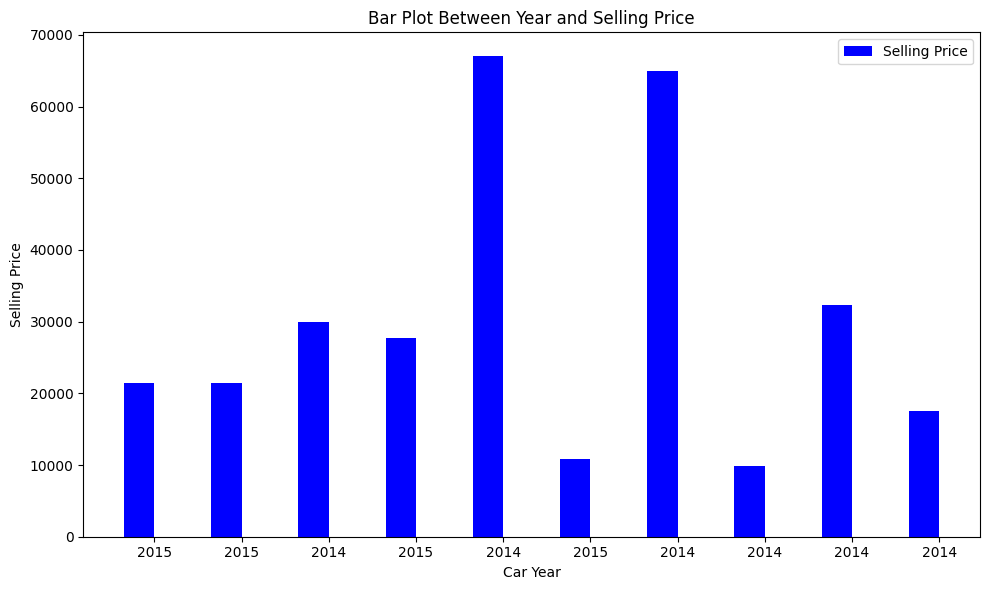

In [ ]:
#Bar chart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices
indices = np.arange(len(years))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(indices, selling_prices, width=0.35, label='Selling Price', color='b', align='center')

# Add labels for 'Year' on x-axis and title
plt.xlabel('Car Year')
plt.ylabel('Selling Price')
plt.title('Bar Plot Between Year and Selling Price')

# Set x-ticks to show car years (using the 'Year' column values)
plt.xticks(indices + 0.175, years)  # Align x-ticks with years
plt.legend()
plt.tight_layout()
plt.show()


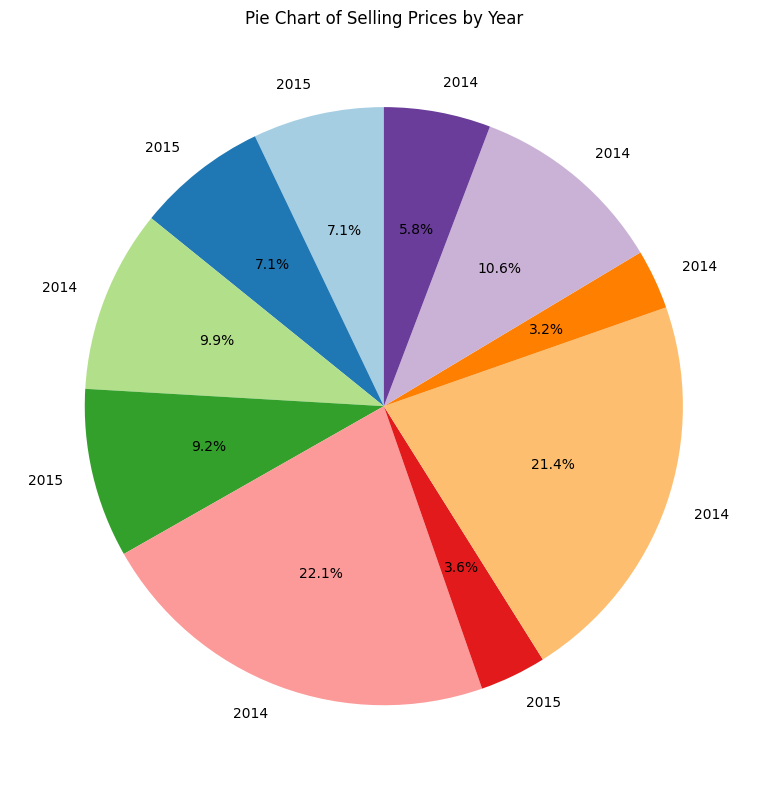

In [ ]:
#Piechart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Plot Pie chart
plt.figure(figsize=(8, 8))
plt.pie(selling_prices, labels=years, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Pie Chart of Selling Prices by Year')

# Display the plot
plt.tight_layout()
plt.show()


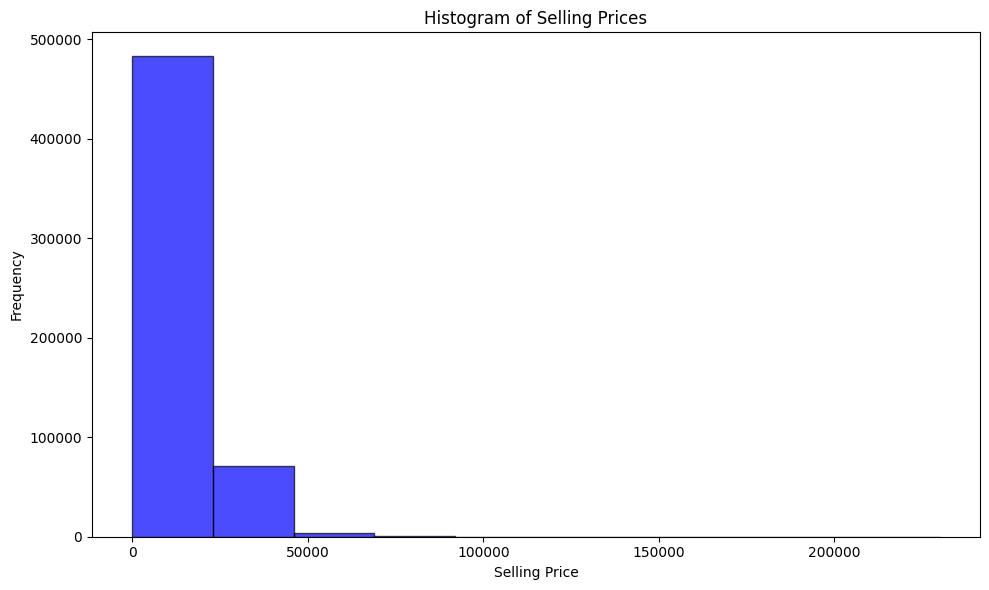

In [ ]:
#Histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with actual column names
selling_price_column = 'sellingprice'

# Extract selling price values (for the entire dataset or top 10 samples as needed)
selling_prices = data[selling_price_column]

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(selling_prices, bins=10, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Histogram of Selling Prices')

# Display the plot
plt.tight_layout()
plt.show()



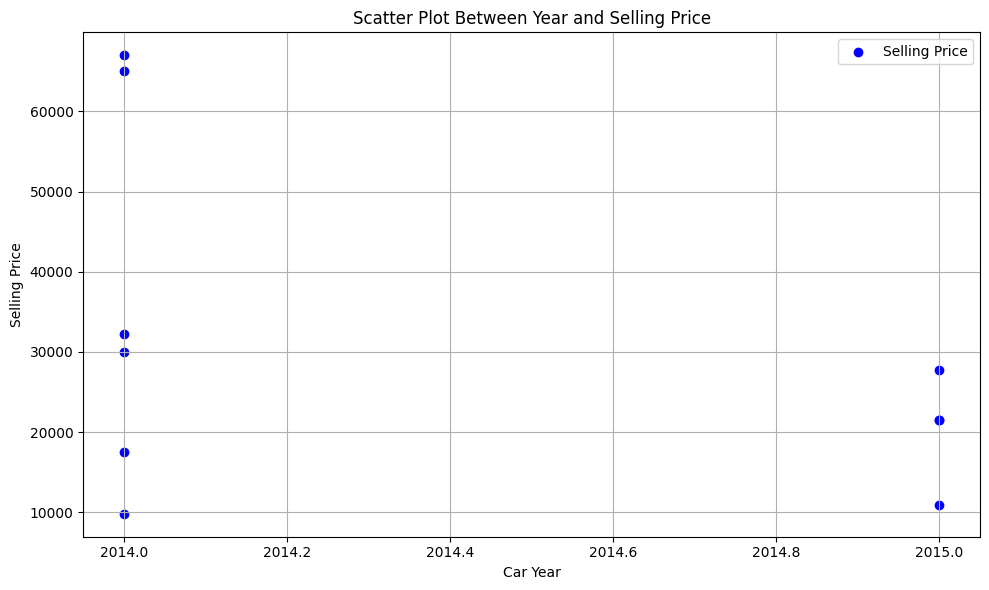

In [ ]:
#Histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with actual column names
selling_price_column = 'sellingprice'

# Extract selling price values (for the entire dataset or top 10 samples as needed)
selling_prices = data[selling_price_column]

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(selling_prices, bins=10, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Histogram of Selling Prices')

# Display the plot
plt.tight_layout()
plt.show()



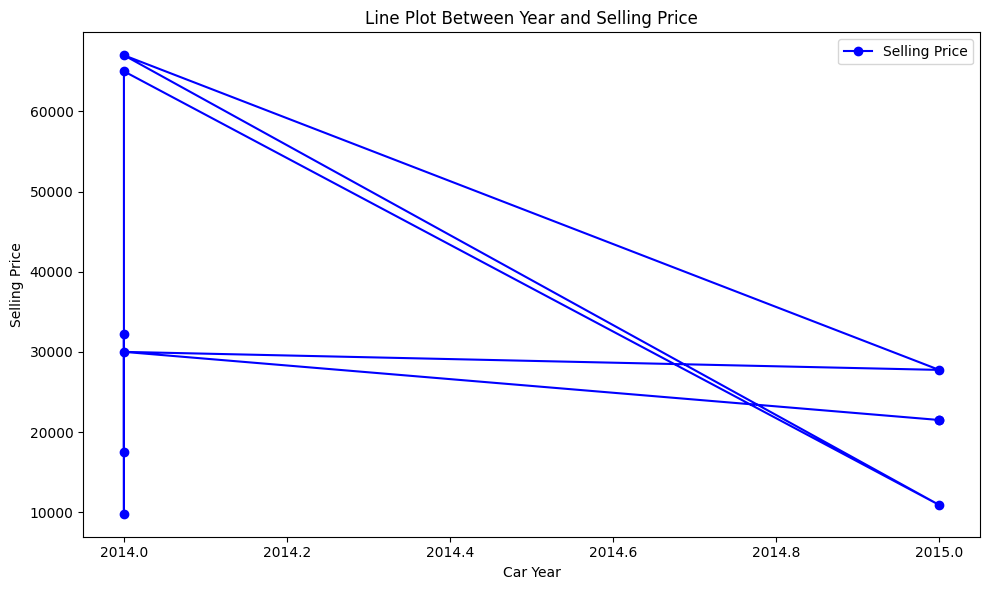

In [ ]:
#Line plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years, selling_prices, marker='o', color='b', label='Selling Price')

# Add labels for 'Year' on x-axis and title
plt.xlabel('Car Year')
plt.ylabel('Selling Price')
plt.title('Line Plot Between Year and Selling Price')

# Add legend
plt.legend()

# Display plot
plt.tight_layout()
plt.show()



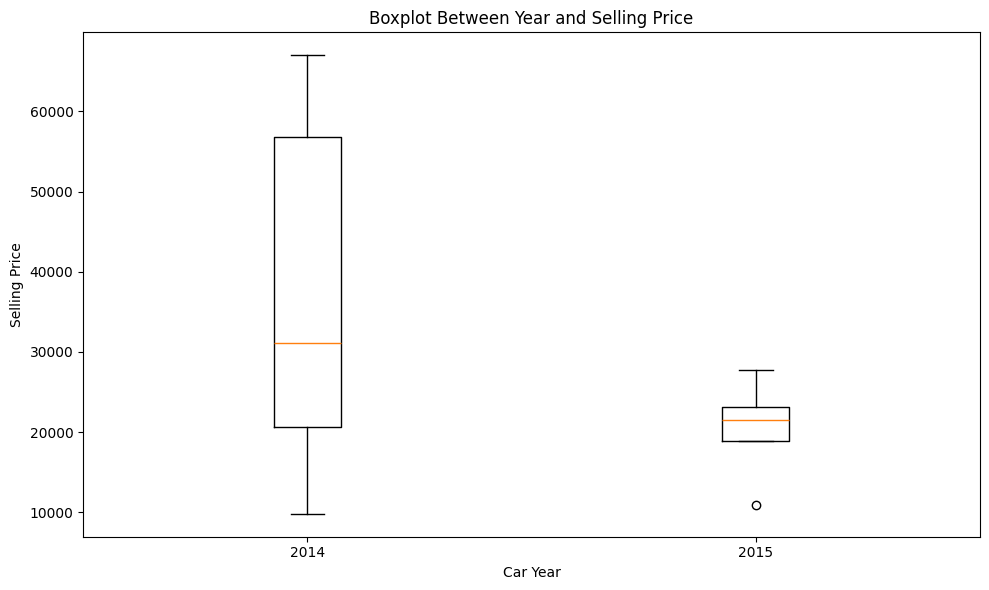

In [ ]:
#Boxplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Group selling prices by 'Year' for the boxplot
grouped_data = [selling_prices[years == year] for year in np.unique(years)]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, labels=np.unique(years))

# Add labels and title
plt.xlabel('Car Year')
plt.ylabel('Selling Price')
plt.title('Boxplot Between Year and Selling Price')

plt.tight_layout()
plt.show()



# **DATA VISUALIZATION STATISTICAL**

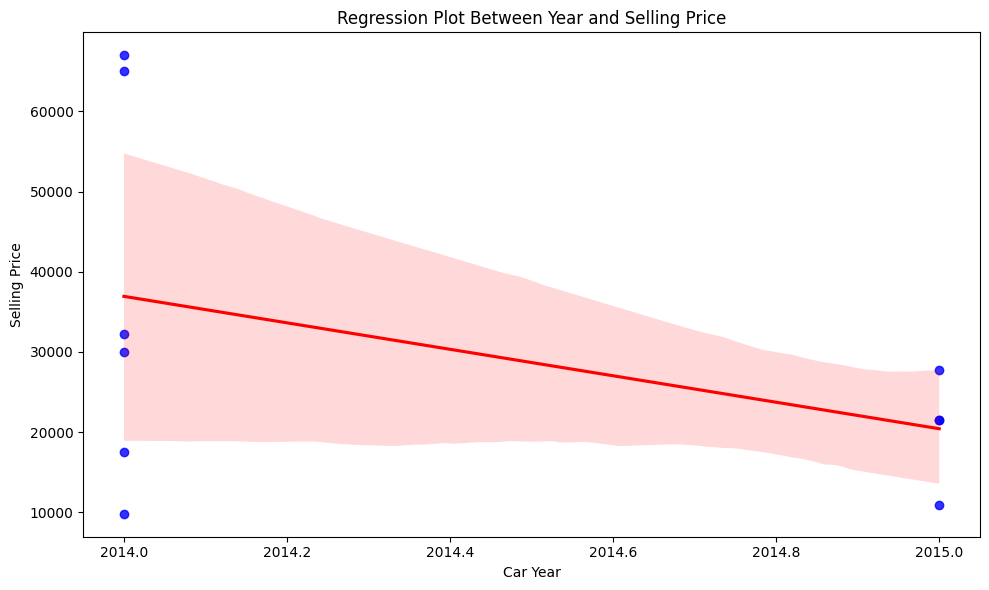

In [ ]:
#Regression plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    year_column: years,
    selling_price_column: selling_prices
})

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=year_column, y=selling_price_column, data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Car Year')
plt.ylabel('Selling Price')
plt.title('Regression Plot Between Year and Selling Price')

plt.tight_layout()
plt.show()


<ipython-input-20-94d818852b83>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=years, palette="viridis")


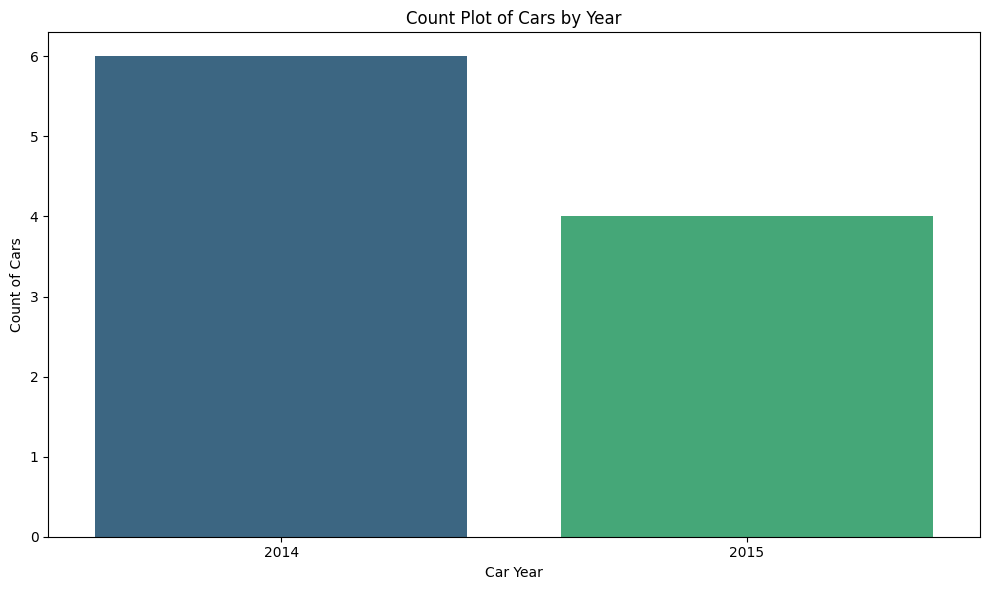

In [ ]:
#Count plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with actual column names
year_column = 'year'  # Column containing car years

# Extract 'Year' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=years, palette="viridis")

# Add labels and title
plt.xlabel('Car Year')
plt.ylabel('Count of Cars')
plt.title('Count Plot of Cars by Year')

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-4-6f08d480e757>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_column, y=selling_price_column, data=aggregated_data, palette="viridis")


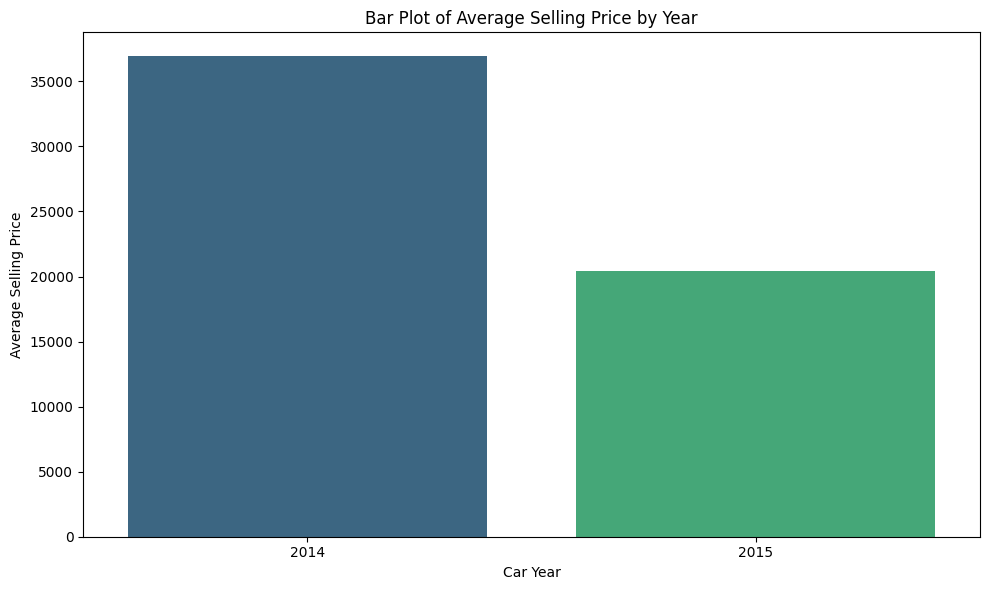

In [ ]:
#Bar plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    year_column: years,
    selling_price_column: selling_prices
})

# Aggregate data to calculate the mean selling price for each year
aggregated_data = df.groupby(year_column)[selling_price_column].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_column, y=selling_price_column, data=aggregated_data, palette="viridis")

# Add labels and title
plt.xlabel('Car Year')
plt.ylabel('Average Selling Price')
plt.title('Bar Plot of Average Selling Price by Year')

plt.tight_layout()
plt.show()


<ipython-input-6-5c28322be3d9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=year_column, y=selling_price_column, data=df, palette="viridis")


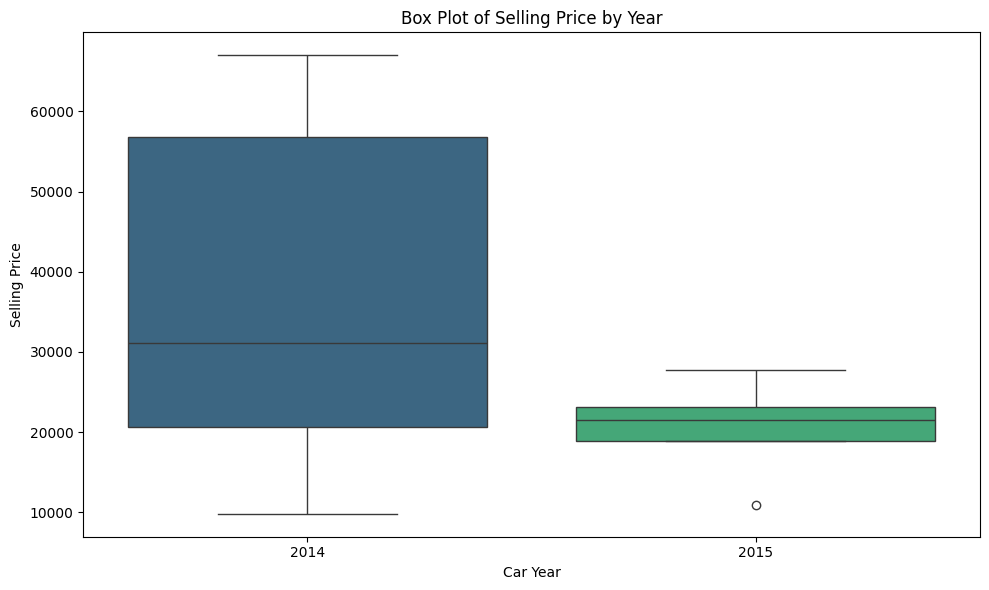

In [ ]:
#Box Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    year_column: years,
    selling_price_column: selling_prices
})

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=year_column, y=selling_price_column, data=df, palette="viridis")

# Add labels and title
plt.xlabel('Car Year')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Year')

plt.tight_layout()
plt.show()


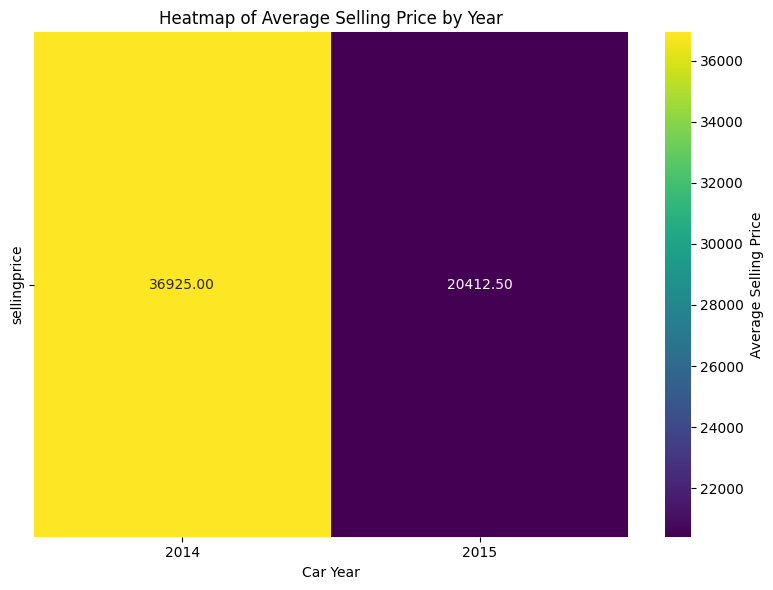

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    year_column: years,
    selling_price_column: selling_prices
})

# Prepare data for the heatmap (group by year)
heatmap_data = df.groupby(year_column)[selling_price_column].mean().reset_index()

# Reshape the data (years as rows, selling prices as a single column)
heatmap_data = heatmap_data.set_index(year_column).T  # Transpose the data for heatmap

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Average Selling Price'})

# Add labels and title
plt.xlabel('Car Year')
plt.ylabel('')
plt.title('Heatmap of Average Selling Price by Year')

plt.tight_layout()
plt.show()


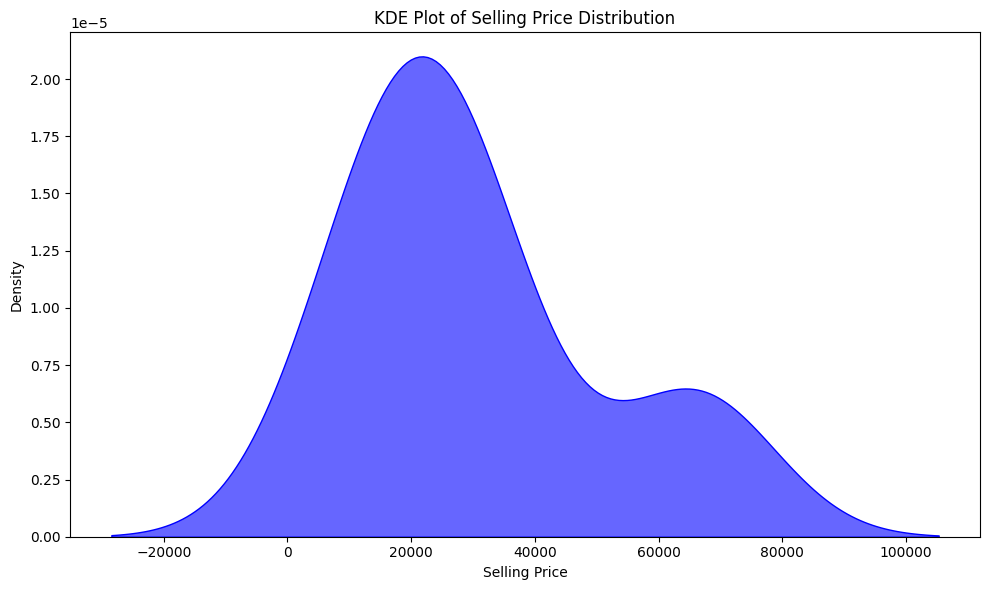

In [ ]:
#KDE Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual column names
year_column = 'year'
selling_price_column = 'sellingprice'

# Extract 'Year' and 'SellingPrice' values for the first 10 samples
years = data[year_column][:10]  # Get the first 10 years
selling_prices = data[selling_price_column][:10]  # Get the first 10 selling prices

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    year_column: years,
    selling_price_column: selling_prices
})

# Plot KDE for selling prices
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=selling_price_column, fill=True, color="blue", alpha=0.6)

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.title('KDE Plot of Selling Price Distribution')

plt.tight_layout()
plt.show()
